### Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge


In [2]:
df = pd.read_csv(r"D:\housing.csv")
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [3]:
target_col = "MEDV"
x = df.drop(target_col, axis=1).values
y = df[target_col].values

### Exploring the Dataset

In [4]:
df.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

In [5]:
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

In [6]:
pd.isnull(df).sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [7]:
df.describe()
# need to scale

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [9]:
df.shape

(489, 4)

### Utilizing graphs to further explore the data

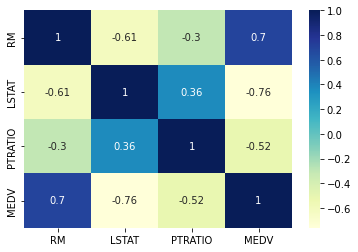

In [10]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

### The number of rooms are highly coordinated with house price, the LSTAT is has a high negative association with house price. LSTAT is percentage of homeowners in the neighborhood considered "lower class" (working poor)

<AxesSubplot:ylabel='Frequency'>

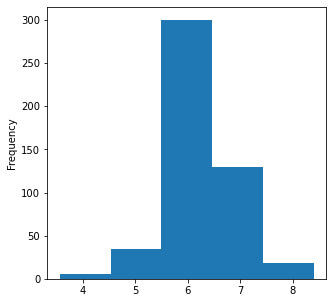

In [12]:
df.RM.plot(kind = 'hist',bins = 5,figsize = (5,5))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

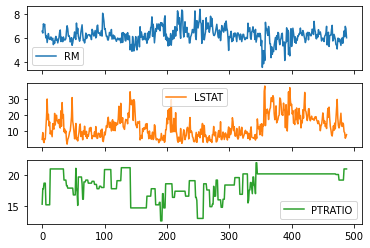

In [13]:
# pLOTTING SUBPLOTS OF ALL DATA
data1 = df[["RM","LSTAT","PTRATIO"]]
data1.plot(subplots = True)


### Train Test Split 

In [14]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [15]:
x_df_train, x_df_test, y_df_train, y_df_test = train_test_split(df.drop(target_col, axis=1), df[target_col], test_size = 0.3)

### Scaling the data

In [16]:
#Scaling
from sklearn.preprocessing import StandardScaler
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
x_train_scaled.shape

(342, 3)

In [20]:
y_train.shape


(342,)

In [21]:
scaler2=StandardScaler()
y_train_scaled=scaler2.fit_transform(y_train.reshape(-1,1)).ravel()
y_test_scaled=scaler2.transform(y_test.reshape(-1,1)).ravel()

### Linear Regression Models

In [22]:
# Start with Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_scaled, y_train_scaled)

#calculate R-squared of regression model
r_squared = regressor.score(x_train_scaled, y_train_scaled)

#view R-squared value
print(r_squared)




0.7166798172458935


In [23]:
scores = cross_val_score(regressor, x, y, scoring ="r2", cv=3)
scores

array([ 0.61684363,  0.29769577, -0.50876814])

In [26]:
# Multiple linear regression 
# Delete this whole code block, its the same as linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_scaled, y_train_scaled)

#calculate R-squared of regression model
r_squared = regressor.score(x_train_scaled, y_train_scaled)

#view R-squared value
print(r_squared)

0.7166798172458935


### Polynomial Regression

In [27]:
from sklearn.preprocessing import PolynomialFeatures 
    
poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(x_train_scaled)
x_poly

poly.fit(x_poly, y_train_scaled)
lin2 = LinearRegression() 
lin2.fit(x_poly, y_train_scaled)

#fit regression model
#poly.fit(x_train_scaled, y_train)

#df.to_numpy().shape                                                                          
#df.loc[1].to_numpy() 
#calculate R-squared of regression model
#r2 = r_squared(y_train, y_test)

#view R-squared value
print(r_squared)
# When R2<0 , a horizontal line explains the data better than your model.


0.7166798172458935


In [28]:
x_poly.shape,y.shape

((342, 20), (489,))

In [29]:
poly.fit(x_poly, y)
lin2 = LinearRegression() 
lin2.fit(x_poly, y_train_scaled)

LinearRegression()

Text(0, 0.5, 'MEDV')

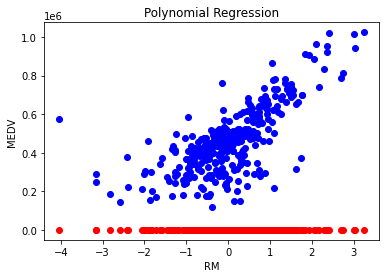

In [30]:
# Visualising the Polynomial Regression results
plt.scatter(x_poly[:, 1], y_train, color = 'blue')
  
plt.scatter(x_poly[:, 1], lin2.predict(x_poly), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('RM')
plt.ylabel('MEDV')

### Lasso Regression

In [31]:
# Lasso Regression
from sklearn.linear_model import Lasso, LassoCV
lasso = Lasso()

lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lasso_cv.fit(x_train_scaled, y_train)
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_scaled, y_train_scaled)
#lasso.fit(x_test, y_test)

y_pred_lass =lasso.predict(x_test_scaled)
print(y_pred_lass)
#Lasso().score(x_train, y_train)


[ 4.73767070e-01 -3.32073715e-01  1.36992642e+00 -5.83973381e-02
  1.96077399e-01 -1.10589395e+00  3.83442445e-01  2.17942387e-01
  2.16470589e-01 -1.55142040e+00  4.52592843e-01  8.60197414e-01
 -4.34293051e-01  5.54157228e-01 -1.12229170e+00 -1.32208356e+00
 -9.95028577e-01 -4.32678519e-02 -4.23805994e-01  1.26257715e+00
 -1.23756150e+00  5.94157155e-01 -1.14913714e+00 -3.48962281e-01
 -4.58314184e-01 -3.78797980e-01  5.65674938e-01 -7.96445559e-01
 -3.72688266e-01  5.48002173e-01 -4.05148699e-01 -3.86148381e-01
 -1.92424588e-01 -9.15545620e-01 -4.18213323e-01  3.00490249e-01
  4.78217813e-01 -3.12708311e-01  1.49483687e+00 -2.79057019e-01
  1.90637438e-01 -1.45728045e+00  6.41807213e-01 -9.01033128e-03
 -2.03929118e-01  3.55543858e-01 -3.35645187e-01 -2.01131194e-02
  8.46023239e-01  1.66897125e-01 -4.52858664e-01  4.79942375e-01
  7.60726521e-01  1.72891159e-01 -9.13700220e-01 -6.52457912e-01
 -2.47263019e-01 -5.21121761e-02 -3.63876170e-01  1.21039307e+00
 -4.26969888e-01  1.31414

In [32]:
# best alpha parameter

alpha = lasso_cv.alpha_
alpha

6.8052214486888305

In [33]:
lasso2 = Lasso(alpha = lasso_cv.alpha_)
lasso2.fit(x_train_scaled, y_train_scaled)

Lasso(alpha=6.8052214486888305)

In [34]:
lasso.score(x_train_scaled, y_train_scaled)

0.7003920479442162

In [35]:
lasso.score(x_test_scaled, y_test_scaled)

0.6911783099639938

### Ridge Regression

In [36]:
# Ridge Regression
ridge = Ridge(alpha = .00000001, normalize = True)
ridge.fit(x_train_scaled,y_train_scaled)
ridge_predict = ridge.predict(x_test_scaled)
print('Ridge score: ',ridge.score(x_test_scaled,y_test_scaled))

Ridge score:  0.7095830172649829


### Support Vector Regression

In [37]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train_scaled, y_train_scaled)         

#calculate R-squared of regression model
r_squared = regressor.score(x_train_scaled, y_train_scaled)

#view R-squared value
print(r_squared)


0.867760701730116


## Support Vector regression was the best fit model.Linear and polynomial regression were close to each other but 15 points lower than SVR. We see that there is a coorelation between the housing price and number of rooms in the house and well as the number of lower income neighbors in the area. More rooms equals increased price and more lower income neighbors equals lower house price as the value of a house is proportional to the area which it is located.
